Student Name: Martin Power

Student ID: 9939245

### Purpose

The purpose of this E-tivity is to help you become confident in using Numpy’s functionality for matrix manipulation and to learn about a very useful data processing technique: principal components analysis, or PCA. You will find that using Numpy is much easier for matrix manipulation than what you have done to date!

### Task (Complete by Saturday Week 5)

Making use of Numpy, write a Python class to apply the PCA transform to the provided (see Notebook) data set. Compare the output of your implementation to the PCA functionality provided by the Scikitlearn module.

Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.
Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.
Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
Store those results from your fit method that are required to transform the data set, in suitable class properties.
Create a 'transform' method to perform the PCA data transformation on your data set using the parameters obtained using your 'fit' method.
 

N.B.:

Limit your code to the aspects explicitly listed. 
Use the Jupyter Notebook provided in the repository for week 5. This notebook contains the data that needs to be transformed.
The required modules have already been imported for you. You should not import any other modules.
If you find creating a class with this functionality daunting, please start by creating normal functions in your notebook. If time permits, you can then change to use of a class later. 
 

HINTS:

Numpy.mean() will 'flatten' your tensor by default. To obtain the mean along a given axis, you may use the axis parameter.

Numpy.cov() assumes by default that data is presented with one observation per column. This can be changed using the rowvar parameter. 

A Numpy.matrix is a convenient way of performing the matrix operations required for PCA whilst retaining a matrix/vector like structure. Use of this class is discouraged, but would form a good starting point for tackling this week's challenge. Once you have the code working with the matrix class, changing to arrays is relatively straight forward.

You can use Scikitlearn as follows to check the Eigen vectors that you have found with your 'fit' mehod:

pca = PCA(n_components=2)
pca.fit(data)
print(pca.components_)

You can use Scikitlearn to obtain 
GIT push your implementation and post your manual calculations to E-tivity 5: Linear Algebra in Numpy and Beyond and provide the name of your branch.

### Respond (Complete by Wednesday Week 6)

Respond to a post of one of your peers with a respectful and in-depth assessment of the implementation with a view to pointing out potential improvements or sound alternative solutions.

### Reflect (Complete by Saturday Week 6)

With your code (containing any corrections you have made based on your peers’ feedback), do the following:

For the case where n_components = 1, compare the resulting dataset of your transform method with the resulting dataset from Scikitlearn’s transform method by plotting the points on an XY plot. If there are any differences, explain these in a comment directly under the cell with your plot.
For the case where n_components = 1, compare the dataset resulting from your transform method with the original dataset by plotting the points on an XY plot. Comment on the differences between original and transformed data in the cell directly below your plot. In your comment, explain why and how PCA can be used for dimensionality reduction
 

## HINTS:

You can use Scitkitlean as follows to calculate the new values of the data points in the original dataset when you reduce the dimensions of the data (from 2) to 1: 
pca = PCA(n_components=1)
pca.fit(data)
data_pca = pca.transform(data)
data_reduced = pca.inverse_transform(data_pca)

You can use plots to compare the values in your original dataset with the dataset with reduced dimensionality:
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()

You can use your own PCA results to calculate the new values of the data points int the original dataset when you reduce the dimensions of the data (from 2) to 1:
reduced = np.dot(features[:,0],red_highvar.T)+mean.T

with:

reduced: a 2x20 matrix of the new values of the dataset with dimensionality reduction applied
features[:,0]: the 2x1 matrix (or column vector) which contains the Eigen vector associated with the highest variance
red_highvar: a 20x1 matrix containing the reduced dataset which is the output of your transform method with n_components set to 1. 
mean: a 1x2 matrix of the per-column mean values of your original data
T: the transform operator as provided by Numpy

### Rubric

#### Accomplished
Solution exceeding Developing level with 'fit' and 'transform' function. Correctly working implementation with efficient use of flow control elements, data types and operators. All required comments present with reasonable explanations of observations and all required graphs present. Solution may use the numpy matrix class.

#### Exemplary
Solution exceeding Accomplished level without use of the numpy matrix class. High quality content for required comments, and graphs displaying salient information to compare the two approaches.

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [183]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from numpy.linalg import eigh
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [184]:
a_x = 0.05
a_y= 10

In [185]:
rand.seed(0) # MPP DEBUG Seed with 0 to keep random data constant during debug
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])
#data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(4)]) # MPP REDUCE TO 4 TO HELP DEBUGTEMP TODO

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [186]:
data.shape

(20, 2)

In [187]:
# You can use Scikitlearn as follows to check the Eigen vectors 
# that you have found with your 'fit' method:

pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)
data_reduced = pca.inverse_transform(data_pca)



My Eigenvalues
 [6.15317105e+02 4.59156121e-01]
SciKit Eigenvalues
 [6.15317105e+02 4.59156121e-01]

My Eigenvectors
 [[ 0.23854968 -0.97113029]
 [-0.97113029 -0.23854968]]
SciKit Eigenvectors
 [[ 0.23854968  0.97113029]
 [ 0.97113029 -0.23854968]]


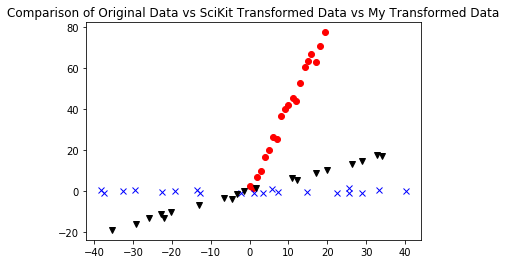

In [188]:
class MyPCA(object):
    
    
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    def fit(self, X):
        # Calculate the mean of each column in D
        M = np.mean(X, axis=0)
        # Centre the columns by subtracting the means
        self.C = X - M
        # Calculate Covariance matrix of Centered matrix
        V = np.cov(self.C, rowvar=False)
        raw_values, raw_vectors = eig(V)
        
        # Sort Eigenvales to determine which Eigenvector is the PCA
        #sorted_indices = np.argsort(values)
        # Credit to Cormac Lavery - replace basic sort with sort of squared values
        sorted_indices = np.argsort(np.square(values))
        self.values = raw_values[sorted_indices[::-1]]
        self.vectors = raw_vectors[sorted_indices[::-1]]
    
        
    def transform(self, X):
        X_new = np.dot(self.C, self.vectors.T) # MPP why not vectors X C
        return X_new
    
    def upd_eigen_vectors(self, new_vectors):
        """This is a debug function to allow the eigen vectors to be updated.
           This allows the eigenvectors from SciKit to be used in place of
           the manually calculated Eigenvectors.
           Currently, debugging an issue where different data is obtained from
           both methods
        """
        self.vectors = new_vectors

# Perform PCA on data using this class
my_pca = MyPCA()
my_pca.fit(data)
data_my_pca = my_pca.transform(data)    

# Compare Eigenvalues and Eigenvectors from both methods
print("\nMy Eigenvalues\n",my_pca.values)
print("SciKit Eigenvalues\n",pca.explained_variance_)


print("\nMy Eigenvectors\n",my_pca.vectors)
print("SciKit Eigenvectors\n",pca.components_)

plt.title('Comparison of Original Data vs SciKit Transformed Data vs My Transformed Data')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_pca[:,0], data_pca[:,1],'xb')
plt.plot(data_my_pca[:,0], data_my_pca[:,1],'kv')
plt.show()

### Comparison of Eigen Vectors and Eigen Values using SciKit and my own Class

The Eigenvalues match but the Eigenvectors do not.
The Eigenvector components have the same magnitude but the polarities differ.

After reading around and viewing other solutions, I cannot find the source or a definitive reason for the mismatch


Eigen Vectors obtained using Scikitlearn with n_components set to 2
[[ 0.23854968  0.97113029]
 [ 0.97113029 -0.23854968]]

Eigen Values obtained using Scikitlearn with n_components set to 2
[6.15317105e+02 4.59156121e-01]

Eigen Vectors obtained using Scikitlearn with n_components set to 1
[[0.23854968 0.97113029]]

Eigen Values obtained using Scikitlearn with n_components set to 1
[615.31710539]


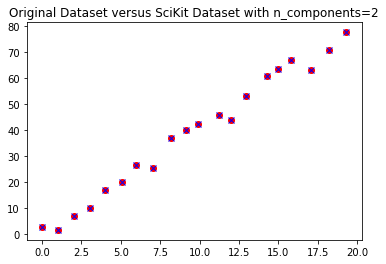

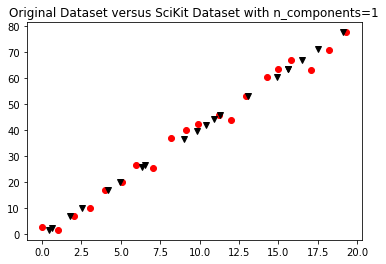

In [189]:
# Re-running SciKit with n_components set to 1
pca1 = PCA(n_components=1)
pca1.fit(data)
data_pca1 = pca1.transform(data)
data_reduced1 = pca1.inverse_transform(data_pca1)


print("\nEigen Vectors obtained using Scikitlearn with n_components set to 2")
print(pca.components_)
print("\nEigen Values obtained using Scikitlearn with n_components set to 2")
print(pca.explained_variance_)

print("\nEigen Vectors obtained using Scikitlearn with n_components set to 1")
print(pca1.components_)
print("\nEigen Values obtained using Scikitlearn with n_components set to 1")
print(pca1.explained_variance_)

plt.title('Original Dataset versus SciKit Dataset with n_components=2')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()

plt.title('Original Dataset versus SciKit Dataset with n_components=1')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced1[:,0], data_reduced1[:,1],'kv')
plt.show()

### Differences Between Using n_components=2 and n_components=1 with SciKit

In the first plot, the original data and the data from SciKit almost align exactly - there has been no reduction in the data

In the second plot, with n_components=1 there has been a reduction in the data. The Y values look almost identical for the various data points but the X values have been shifted left or right of the original X value

### Still To Do
* Replace matrix usage with arrays
* Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
